## Federal Reserve Economic Dataset (FRED)
### Contains
- Industrial Production Index from `January` of `1970` to `December` of 1989 for utilities such as `Gas` and `Electricty`.
- ## ${@author}$-
 - SHASHWAT VAIBHAV

In [1]:
## importing requisite files/libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
## Let's Load the dataset
data = pd.read_csv('Data/EnergyProduction.csv', index_col=0, parse_dates = True)

In [7]:
data.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [10]:
# data.tail() --  you can run this for your own sake
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


### So we do have a total of 240 items/instances 
### out of these, none of them contains nan/null values in EnergyIndex column

In [13]:
## Let's have a look at the frequency
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [15]:
### clearly freq is set None for the Datetime Index
## Let's set it to monthly
data.index.freq = 'MS'
## 'S' signifies START of MONTH
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [16]:
### clearly now freq has been set to 'MS'

<AxesSubplot:xlabel='DATE'>

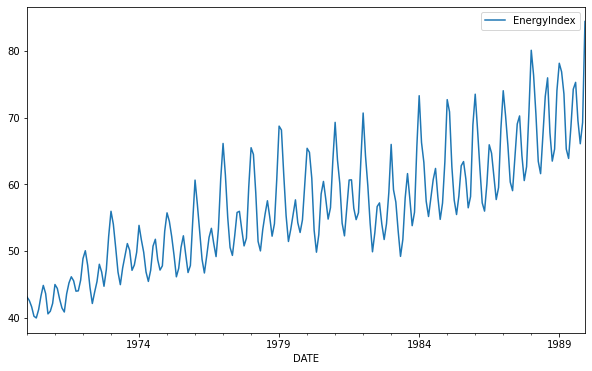

In [19]:
size = (10, 6)
data.plot(figsize = size )

In [20]:
## Let's define a generic function that adds  n_month SIMPLE MOVING AVERAGE column 

def nMonthSMA(data, n):
    #takes n -- number of months(window size)
    col_name = str(n) + 'SMA'
    data[col_name] = data['EnergyIndex'].rolling(window=12).mean()
    return 
    

<AxesSubplot:xlabel='DATE'>

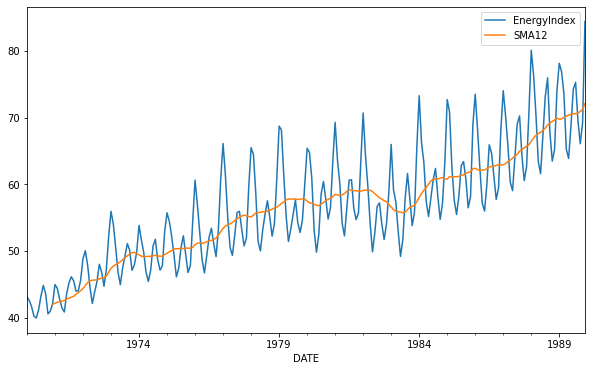

In [21]:
## Let's plot for 12 months window size
nMonthSMA(data, 12)
## Now plot
data.plot(figsize = size)

In [24]:
## Let's plot Simple Exponential Smoothing
##  First load the required method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
## span = 12(12 months)
alpha = 2/(12+1)
##Refer HOLTWINTERS.ipynb for this

model_ses = SES(data['EnergyIndex']).fit(smoothing_level = alpha, optimized=False)
data['12_SimpleExpSmooth'] = model_ses.fittedvalues.shift(-1)
##why did I shift, again---> refer HOLTWINTERS.ipynb 

<AxesSubplot:xlabel='DATE'>

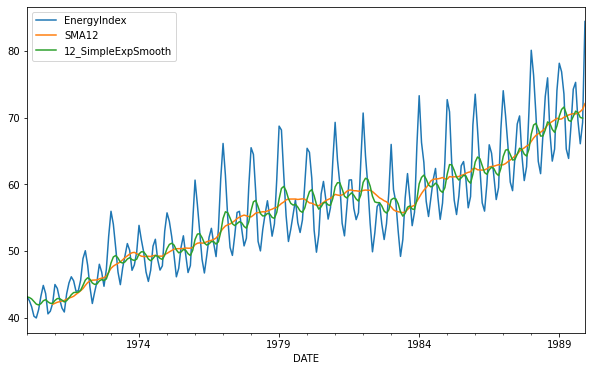

In [25]:
data.plot(figsize = size)

In [28]:
## Now let's plot Triple Exponential Smoothing (or Holt Winters smoothing)  with additive and multiplicative trends 
##  respectively

from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

model_es_add = ES(data['EnergyIndex'], trend='add', seasonal='add', seasonal_periods = 12).fit()
## model with additive trend
model_es_mul = ES(data['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods = 12).fit()
## model with multiplicative trend

data['12_HWExpSmoothing_ADD'] = model_es_add.fittedvalues.shift(-1)
data['12_HWExpSmoothing_MUL'] = model_es_mul.fittedvalues.shift(-1)


<AxesSubplot:xlabel='DATE'>

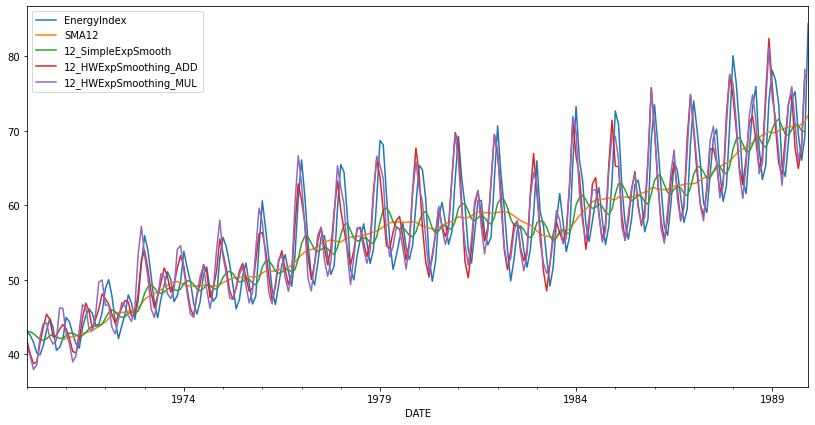

In [29]:
## Let's all the fitted model once
size = (14,7)
data.plot(figsize = size)

In [30]:
data.head()

,EnergyIndex,SMA12,12_SimpleExpSmooth,12_HWExpSmoothing_ADD,12_HWExpSmoothing_MUL
DATE,,,,,
1970-01-01,43.0869,NaN,43.086900,41.795431,41.068159
1970-02-01,42.5577,NaN,43.005485,40.062152,39.724743
1970-03-01,41.6215,NaN,42.792564,38.738775,37.961982
1970-04-01,40.1982,NaN,42.393431,38.954960,38.600731
1970-05-01,39.9321,NaN,42.014765,41.495756,42.335711


<AxesSubplot:xlabel='DATE'>

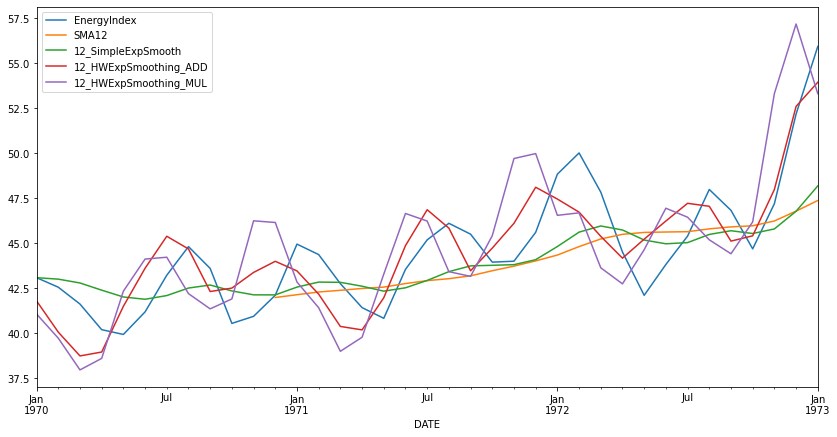

In [31]:
## let's plot for the first 3 years 
data[:'1973-01-01'].plot(figsize = size)

<AxesSubplot:xlabel='DATE'>

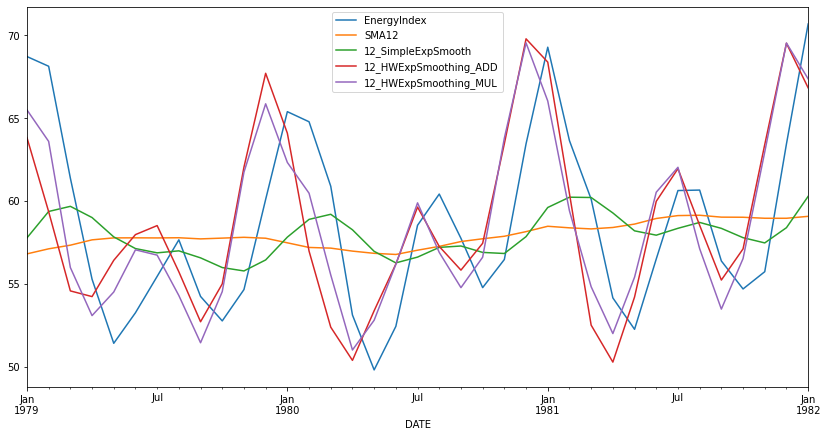

In [33]:
# Let's plot for middle 3 years
data['1979-01-01':'1982-01-01'].plot(figsize =size)

<AxesSubplot:xlabel='DATE'>

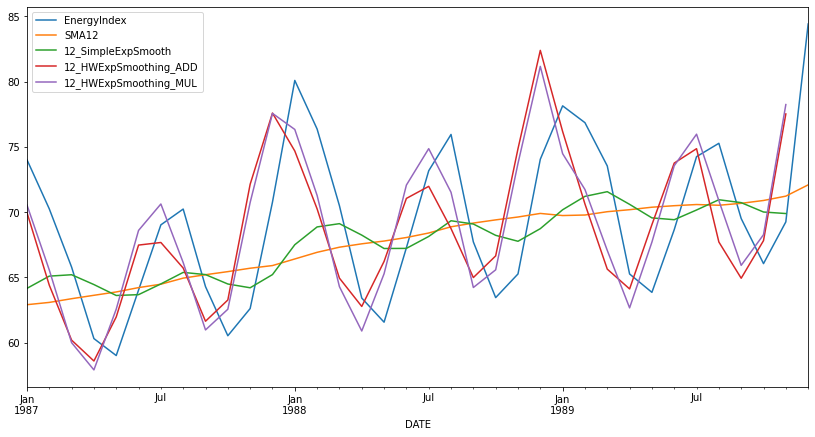

In [34]:
## Let's plot for last 3 years
data['1987-01-01':].plot(figsize = size)